In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

In [3]:
os.chdir('E:\\Christ\\2021\\Dataset')

In [4]:
soya = pd.read_csv('USSoybeanOil.csv')

In [5]:
soya.head()

Date  Price   Open   High    Low    Vol. Change %
0  Jul 30, 2021  64.33  64.85  64.94  63.91       -   -3.88%
1  Jul 29, 2021  66.93  66.67  68.17  66.35   8.65K    0.57%
2  Jul 28, 2021  66.55  66.50  66.89  65.62  13.20K    0.44%
3  Jul 27, 2021  66.26  67.05  67.63  65.86  23.35K   -0.26%
4  Jul 26, 2021  66.43  65.73  66.48  64.45  21.15K    1.17%

In [6]:
soya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 7 columns):
Date        2734 non-null object
Price       2734 non-null float64
Open        2734 non-null float64
High        2734 non-null float64
Low         2734 non-null float64
Vol.        2734 non-null object
Change %    2734 non-null object
dtypes: float64(4), object(3)
memory usage: 149.6+ KB


#### Convert Date which is an object to a datetime format

In [7]:
soya['Date1'] = pd.to_datetime(soya['Date'], format = '%b %d, %Y')

In [8]:
soya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 8 columns):
Date        2734 non-null object
Price       2734 non-null float64
Open        2734 non-null float64
High        2734 non-null float64
Low         2734 non-null float64
Vol.        2734 non-null object
Change %    2734 non-null object
Date1       2734 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 171.0+ KB


In [9]:
soya.head()

Date  Price   Open   High    Low    Vol. Change %      Date1
0  Jul 30, 2021  64.33  64.85  64.94  63.91       -   -3.88% 2021-07-30
1  Jul 29, 2021  66.93  66.67  68.17  66.35   8.65K    0.57% 2021-07-29
2  Jul 28, 2021  66.55  66.50  66.89  65.62  13.20K    0.44% 2021-07-28
3  Jul 27, 2021  66.26  67.05  67.63  65.86  23.35K   -0.26% 2021-07-27
4  Jul 26, 2021  66.43  65.73  66.48  64.45  21.15K    1.17% 2021-07-26

In [11]:
soya.sort_values('Date1', inplace=True)

In [12]:
soya.head()

Date  Price   Open   High    Low   Vol. Change %      Date1
2733  Jul 31, 2011  55.99  55.87  55.99  55.81      -    0.62% 2011-07-31
2732  Aug 01, 2011  56.15  56.04  56.51  55.90  3.78K    0.28% 2011-08-01
2731  Aug 02, 2011  57.09  56.30  57.07  56.00  2.05K    1.67% 2011-08-02
2730  Aug 03, 2011  56.28  56.92  56.92  56.26  1.77K   -1.42% 2011-08-03
2729  Aug 04, 2011  55.18  55.72  55.72  54.88  1.85K   -1.95% 2011-08-04

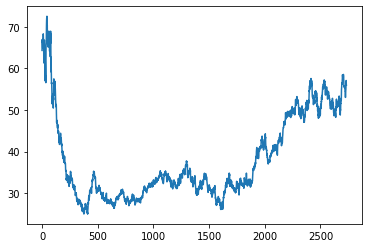

In [14]:
plt.plot(soya['Price']);

In [16]:
soya.set_index('Date1', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


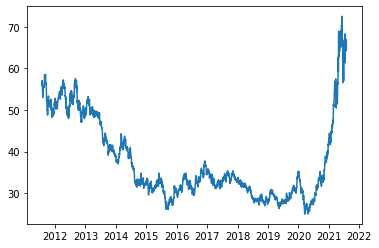

In [17]:
plt.plot(soya['Price']);

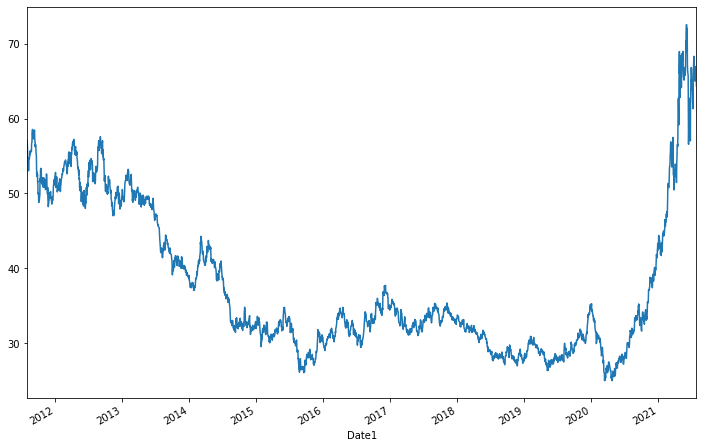

In [20]:
plt.figure(figsize=(12,8))
soya['Price'].plot();

In [19]:
import plotly.express as px

In [23]:
soya.reset_index(inplace=True)

In [24]:
soya.head()

Date1          Date  Price   Open   High    Low   Vol. Change %
0 2011-07-31  Jul 31, 2011  55.99  55.87  55.99  55.81      -    0.62%
1 2011-08-01  Aug 01, 2011  56.15  56.04  56.51  55.90  3.78K    0.28%
2 2011-08-02  Aug 02, 2011  57.09  56.30  57.07  56.00  2.05K    1.67%
3 2011-08-03  Aug 03, 2011  56.28  56.92  56.92  56.26  1.77K   -1.42%
4 2011-08-04  Aug 04, 2011  55.18  55.72  55.72  54.88  1.85K   -1.95%

In [25]:
fig = px.line(soya, x='Date1', y='Price', title='Time series with plotly')
fig.show()

In [26]:
soya.set_index('Date1',inplace=True)

##### Convert the daily data into weekly data 

In [27]:
ts = soya.Price

In [28]:
ts

Date1
2011-07-31    55.99
2011-08-01    56.15
2011-08-02    57.09
2011-08-03    56.28
2011-08-04    55.18
              ...  
2021-07-26    66.43
2021-07-27    66.26
2021-07-28    66.55
2021-07-29    66.93
2021-07-30    64.33
Name: Price, Length: 2734, dtype: float64

In [29]:
tsw = ts.resample('W').mean()

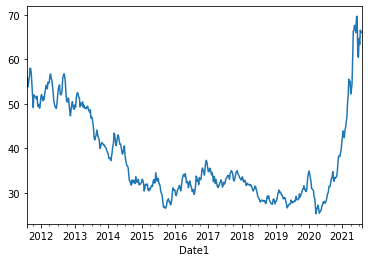

In [31]:
tsw.plot();

In [34]:
tsw.isna().any()

False

#### Convert the daily data to monthly

In [35]:
tsm = ts.resample('M').mean()

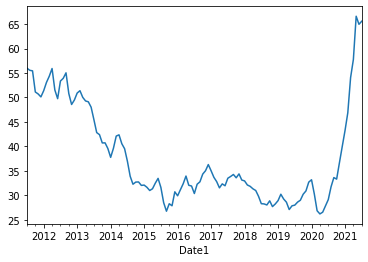

In [37]:
tsm.plot();

In [38]:
# Additive Model: ts = trend+seasonal+cyclical+irregular
# Multiplicative Model: ts = trend*seasonal*cyclical*irregular

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
tsmA = seasonal_decompose(tsm, model='additive')

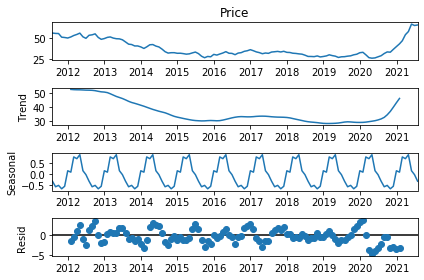

In [42]:
tsmA.plot();

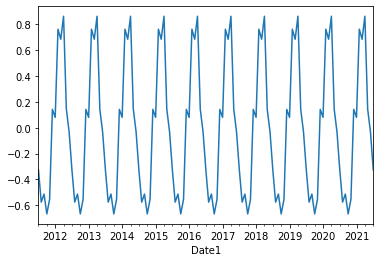

In [44]:
tsmA.seasonal.plot();

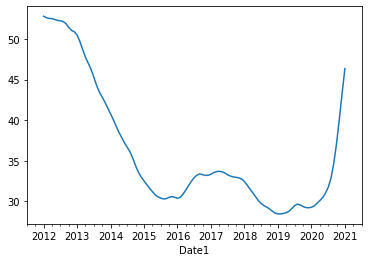

In [45]:
tsmA.trend.plot();

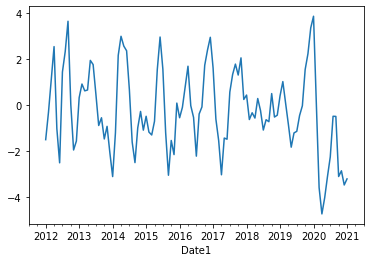

In [46]:
tsmA.resid.plot();

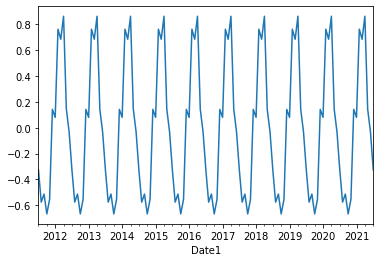

In [47]:
tsmA.seasonal.plot();

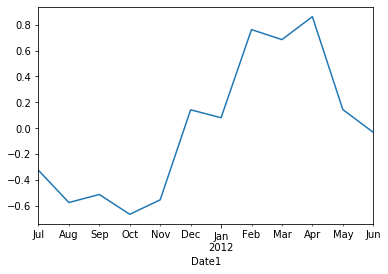

In [48]:
tsmA.seasonal[0:12].plot();

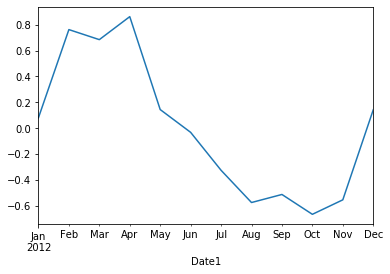

In [49]:
tsmA.seasonal[6:18].plot();

In [50]:
tsmM = seasonal_decompose(tsm, model='multiplicative')

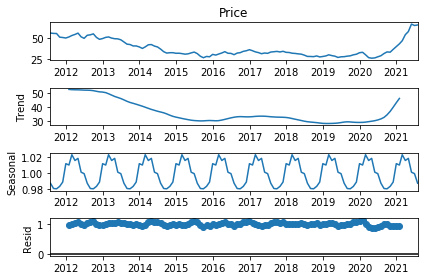

In [52]:
tsmM.plot();

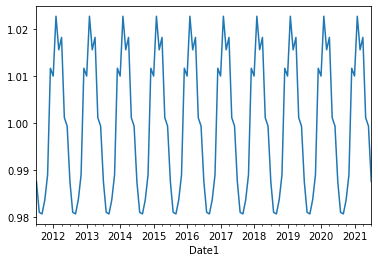

In [51]:
tsmM.seasonal.plot();

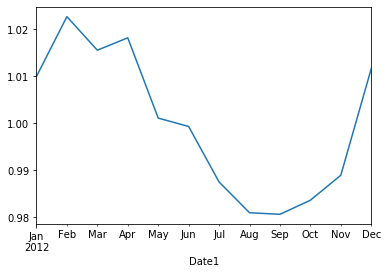

In [53]:
tsmM.seasonal[6:18].plot();

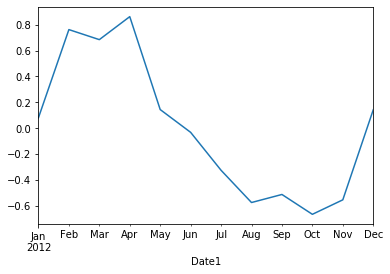

In [54]:
tsmA.seasonal[6:18].plot();

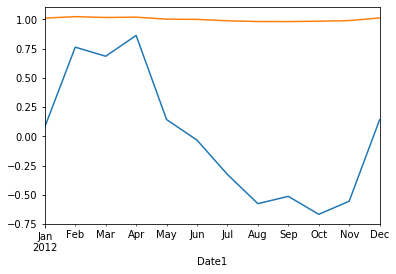

In [55]:
tsmA.seasonal[6:18].plot();
tsmM.seasonal[6:18].plot();

In [56]:
tsm_add = tsmA.seasonal[6:18]
tsm_mult = tsmM.seasonal[6:18]

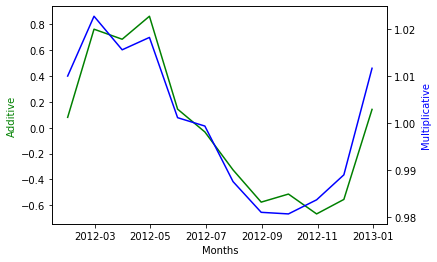

In [60]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(tsm_add, 'g-')
ax2.plot(tsm_mult, 'b-');

ax1.set_xlabel('Months')
ax1.set_ylabel('Additive', color='g')
ax2.set_ylabel('Multiplicative', color='b');

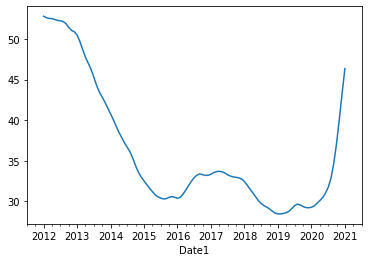

In [61]:
tsmA.trend.plot();

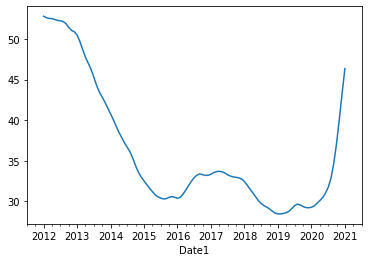

In [62]:
tsmM.trend.plot();

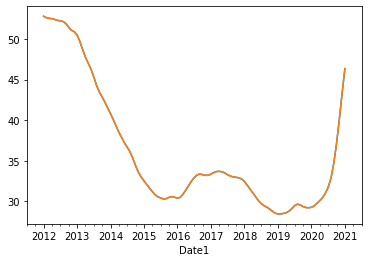

In [67]:
tsmM.trend.plot();
tsmA.trend.plot();

In [63]:
tsmAT = tsmA.trend
tsmMT = tsmM.trend

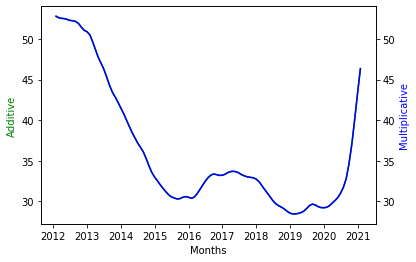

In [64]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(tsmAT, 'g-')
ax2.plot(tsmMT, 'b-');

ax1.set_xlabel('Months')
ax1.set_ylabel('Additive', color='g')
ax2.set_ylabel('Multiplicative', color='b');

### Holt-Winters Model

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [106]:
model = ExponentialSmoothing(ts, trend='add', seasonal='add',seasonal_periods=6)

fitted_model = model.fit()

print(fitted_model.summary())

# Forecast future values
forecast = fitted_model.forecast(steps=30)

#print(forecast)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                 2734
Model:             ExponentialSmoothing   SSE                            943.372
Optimized:                         True   AIC                          -2889.142
Trend:                         Additive   BIC                          -2830.007
Seasonal:                      Additive   AICC                         -2889.027
Seasonal Periods:                     6   Date:                 Sat, 20 Jul 2024
Box-Cox:                          False   Time:                         15:59:07
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9318906                alpha                 True
smoothing_trend          

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



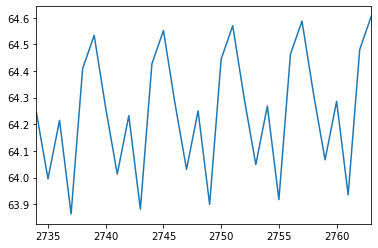

In [107]:
forecast.plot();

### Cut-off date based on the structural change

In [76]:
# strucchange library in R which is used to find out the structural chanage point

#### Chow test to findout if there is a structural change at point 2020-03-30

In [79]:
soya[soya.index == '2020-03-30']

Date  Price   Open   High    Low    Vol. Change %
Date1                                                                
2020-03-30  Mar 30, 2020  26.87  26.83  27.38  26.62  47.32K    0.30%

In [80]:
soya1 = soya.reset_index()

In [81]:
soya1[soya1.Date1 == '2020-03-30']

Date1          Date  Price   Open   High    Low    Vol. Change %
2335 2020-03-30  Mar 30, 2020  26.87  26.83  27.38  26.62  47.32K    0.30%

In [85]:
import statsmodels.api as sm

In [88]:
# break point 2335 , 2020-03-30
n = len(ts)
X = np.arange(n)
X = sm.add_constant(X)
break_point = 2335

### Fit the regression model

In [87]:
full_model = sm.OLS(ts, X).fit()
full_rss = np.sum(full_model.resid**2)

### Fit the models on each segment

In [89]:
ts[:break_point]

Date1
2011-07-31    55.99
2011-08-01    56.15
2011-08-02    57.09
2011-08-03    56.28
2011-08-04    55.18
              ...  
2020-03-24    26.55
2020-03-25    26.64
2020-03-26    26.50
2020-03-27    26.85
2020-03-29    26.79
Name: Price, Length: 2335, dtype: float64

In [90]:
ts[break_point:]

Date1
2020-03-30    26.87
2020-03-31    27.01
2020-04-01    26.05
2020-04-02    26.24
2020-04-03    26.43
              ...  
2021-07-26    66.43
2021-07-27    66.26
2021-07-28    66.55
2021-07-29    66.93
2021-07-30    64.33
Name: Price, Length: 399, dtype: float64

In [93]:
model1 = sm.OLS(ts[:break_point], X[:break_point]).fit()
model2 = sm.OLS(ts[break_point:], X[break_point:]).fit()
rss1 = np.sum(model1.resid**2)
rss2 = np.sum(model2.resid**2)

In [98]:
k = X.shape[1]
chow_stat = ((full_rss -(rss1+rss2))/k) / ((rss1+rss2)/ (n-2*k))
print(chow_stat)

4239.325004671147


In [99]:
from scipy import stats
# calculate the p-value
df_numerator = k
df_denominator = n-2*k

p_value = stats.f.sf(chow_stat, df_numerator, df_denominator)
print(p_value)

0.0


In [102]:
ts1 = ts[ts.index > '2020-03-30']

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                  398
Model:             ExponentialSmoothing   SSE                            470.152
Optimized:                         True   AIC                             86.309
Trend:                         Additive   BIC                            126.173
Seasonal:                      Additive   AICC                            87.119
Seasonal Periods:                     6   Date:                 Sat, 20 Jul 2024
Box-Cox:                          False   Time:                         15:58:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8745909                alpha                 True
smoothing_trend          

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



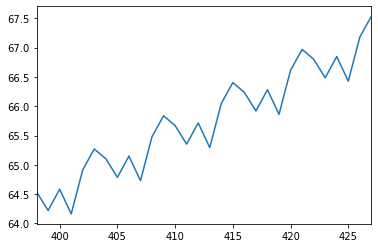

In [104]:
model_new = ExponentialSmoothing(ts1, trend='add', seasonal='add',seasonal_periods=6)

fitted_model = model_new.fit()

print(fitted_model.summary())

# Forecast future values
forecast = fitted_model.forecast(steps=30)

#print(forecast)



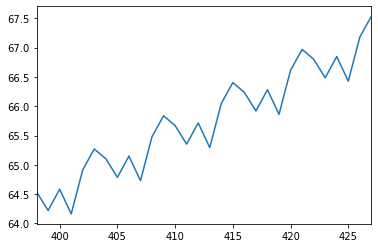

In [105]:
forecast.plot();